#Libraries and data

In [ ]:
!pip install pmdarima

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#change directory
%cd /content/drive/MyDrive/Time Series Forecasting Product

/content/drive/MyDrive/Time Series Forecasting Product


In [ ]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm

In [ ]:
#load the data
#YYYY-MM-DD
df = pd.read_csv('nyc_data.csv', index_col = 0, parse_dates = True)
future_df = pd.read_csv('future.csv', index_col = 0, parse_dates = True)
future_df.head()

,Demand,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,,
2021-01-01,NaN,0,0,0,5.00,154.221
2021-01-02,NaN,0,0,0,11.11,264.805
2021-01-03,NaN,0,0,0,3.89,115.499
2021-01-04,NaN,0,0,0,6.67,124.650
2021-01-05,NaN,0,0,0,5.56,77.968


In [ ]:
#Rename variable
df = df.rename(columns = {'Demand': 'y'})
df.head(0)

,y,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,,


In [ ]:
#Extract regressors
train_X = df.iloc[:,1:]
future_X = future_df.iloc[:,1:]
future_X.head(0)

,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,


#SARIMAX model

In [ ]:
#get the best parameters
parameters  = pd.read_csv("Forecasting Product/best_params_sarimax.csv", 
                          index_col = 0)
parameters

,31
D,1.000000
P,1.000000
Q,1.000000
d,1.000000
p,1.000000
q,1.000000
rmse,59.955245


In [ ]:
#store the individuals parameters
p = parameters.loc["p"][0]
d = parameters.loc["d"][0]
q = parameters.loc["q"][0]
P = parameters.loc["P"][0]
D = parameters.loc["D"][0]
Q = parameters.loc["Q"][0]

In [ ]:
#Model
#hourly: 24, daily: 7, weekly:52, monthly:12, quarterly:4
model = pm.ARIMA(order = (p,d,q),
                 seasonal_order = (P,D,Q, 7),
                 X = train_X,
                 suppress_warning = True,
                 force_stationarity = False)
model.fit(df.y)

ARIMA(order=(1.0, 1.0, 1.0), seasonal_order=(1.0, 1.0, 1.0, 7))

#Forecasting

In [ ]:
#predictions
predictions_sarimax = pd.Series(model.predict(n_periods = len(future_df),
                                              X = future_X)).rename("sarimax")
predictions_sarimax.index = future_df.index
predictions_sarimax

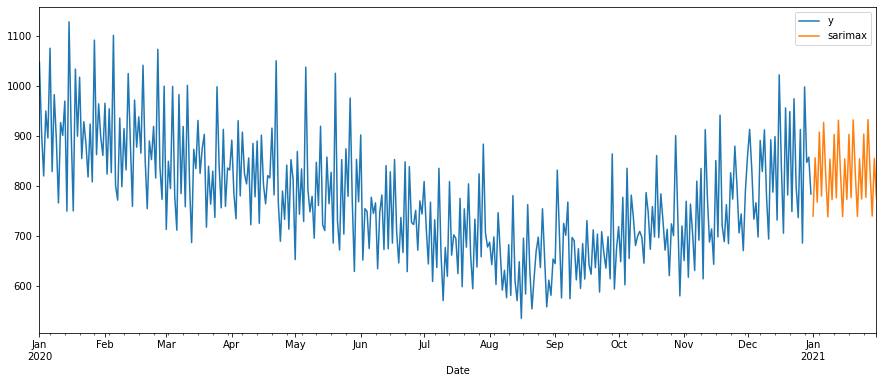

In [ ]:
#visulization
df['y']['2020-01-01':].plot(figsize = (15,6), legend = True)
predictions_sarimax.plot(legend = True)

In [ ]:
#exporting
predictions_sarimax.to_csv("Forecasting Product/Ensemble/predictions_sarimax.csv")